# Decision tree classification using CART
## by Ramu Revooru

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.metrics import  accuracy_score
# creating a function to check the accuracy scores 
def evaluate_model(act, pred):
  print("Accurcay : ", accuracy_score(act, pred))

##  Reading the files using pandas

In [3]:
data = pd.read_csv("traindata.csv")

## Checking the shape of the data (no:of rows and columns)

In [4]:
data.shape

(44068, 34)

## First five rows in the data

In [5]:
data.head()

,Id,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,...,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group,Status
0,56421,0.0,1555,hand pump,basin3,village8556,region4,15,ward500,3,...,never pay,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,0
1,21324,500.0,857,communal standpipe multiple,basin7,village7372,region5,10,ward1800,5,...,monthly,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,0
2,74,0.0,0,communal standpipe,basin1,village9460,region6,17,ward883,3,...,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,0
3,74038,0.0,0,other,basin5,village13878,region13,18,ward1505,7,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,0
4,29929,0.0,0,hand pump,basin4,village5192,region6,14,ward942,4,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,1


## last five rows in the data

In [6]:
data.tail()

,Id,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,...,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group,Status
44063,33555,0.0,0,improved spring,basin5,village16282,region13,18,ward1422,2,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,improved spring,1
44064,17775,0.0,618,hand pump,basin8,village10061,region5,10,ward2060,1,...,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,0
44065,34200,0.0,1582,communal standpipe,basin7,village9791,region12,11,ward1897,4,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,0
44066,17012,200.0,629,communal standpipe,basin6,village12243,region15,3,ward1248,3,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,1
44067,28533,0.0,1512,hand pump,basin1,village2454,region7,13,ward1948,4,...,never pay,soft,good,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,0


## Summary of the data

In [7]:
data.describe(include='all')

,Id,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,...,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group,Status
count,44068.000000,44068.000000,44068.000000,44068,44068,44068,44068,44068.000000,44068,44068.000000,...,44068,44068,44068,44068,44068,44068,44068,44068,44068,44068.000000
unique,NaN,NaN,NaN,7,9,16471,21,NaN,2087,NaN,...,7,8,6,5,5,10,7,3,6,NaN
top,NaN,NaN,NaN,communal standpipe,basin5,village18166,region12,NaN,ward1290,NaN,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,communal standpipe,NaN
freq,NaN,NaN,NaN,21085,7397,382,4190,NaN,240,NaN,...,18752,37551,37551,24610,24610,12617,12617,34384,25401,NaN
mean,37092.516384,329.781607,674.305460,NaN,NaN,NaN,NaN,15.224539,NaN,5.664382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.585640
std,21490.884249,3127.604462,698.062813,NaN,NaN,NaN,NaN,17.566722,NaN,9.670612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.492617
min,0.000000,0.000000,-63.000000,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,18363.250000,0.000000,0.000000,NaN,NaN,NaN,NaN,5.000000,NaN,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,37021.500000,0.000000,370.000000,NaN,NaN,NaN,NaN,12.000000,NaN,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,55685.250000,20.000000,1327.000000,NaN,NaN,NaN,NaN,17.000000,NaN,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


## data types

In [8]:
data.dtypes

Id                         int64
Amount_of_water          float64
Gps_height                 int64
Waterpoint_type           object
Basin_name                object
Village                   object
Regionname                object
Region_code                int64
Wardname                  object
District_code              int64
Population                 int64
Public_meeting            object
Organization_funding      object
Organization_surveyed     object
Scheme_management         object
SchemeName                object
Permit                    object
Company_installed         object
Management                object
Management_group          object
Extraction_type           object
Extraction_type_group     object
Extraction_type_class     object
Payment                   object
Payment_type              object
Water_quality             object
Quality_group             object
Quantity                  object
Quantity_group            object
Source                    object
Source_typ

## Checking the unique values

In [9]:
data.nunique()

Id                       44068
Amount_of_water             91
Gps_height                2389
Waterpoint_type              7
Basin_name                   9
Village                  16471
Regionname                  21
Region_code                 27
Wardname                  2087
District_code               20
Population                 955
Public_meeting               2
Organization_funding      2380
Organization_surveyed        1
Scheme_management           12
SchemeName                2505
Permit                       2
Company_installed         1873
Management                  12
Management_group             5
Extraction_type             18
Extraction_type_group       13
Extraction_type_class        7
Payment                      7
Payment_type                 7
Water_quality                8
Quality_group                6
Quantity                     5
Quantity_group               5
Source                      10
Source_type                  7
Source_class                 3
Waterpoi

## Checking the null values

In [10]:
data.isnull().sum()

Id                           0
Amount_of_water              0
Gps_height                   0
Waterpoint_type              0
Basin_name                   0
Village                      0
Regionname                   0
Region_code                  0
Wardname                     0
District_code                0
Population                   0
Public_meeting            2525
Organization_funding      2600
Organization_surveyed        0
Scheme_management         2930
SchemeName               20951
Permit                    2227
Company_installed         2603
Management                   0
Management_group             0
Extraction_type              0
Extraction_type_group        0
Extraction_type_class        0
Payment                      0
Payment_type                 0
Water_quality                0
Quality_group                0
Quantity                     0
Quantity_group               0
Source                       0
Source_type                  0
Source_class                 0
Waterpoi

## Visualizations

<AxesSubplot:xlabel='Regions'>

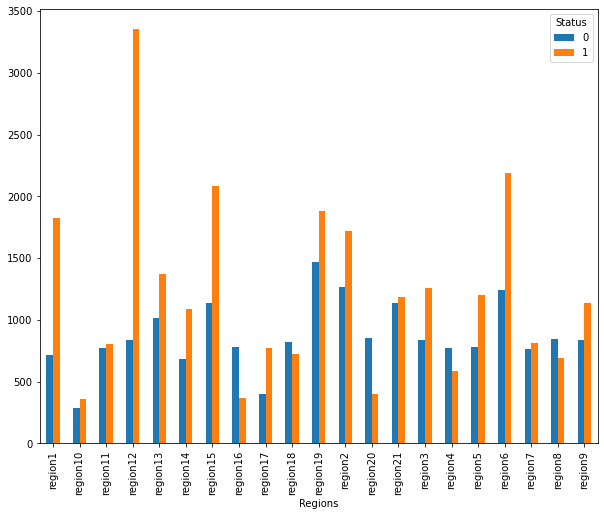

In [11]:
ctab = pd.crosstab(index=data['Regionname'], columns=data['Status'])
ctab.plot.bar(figsize=(10,8), xlabel='Regions')

<AxesSubplot:xlabel='Management_group'>

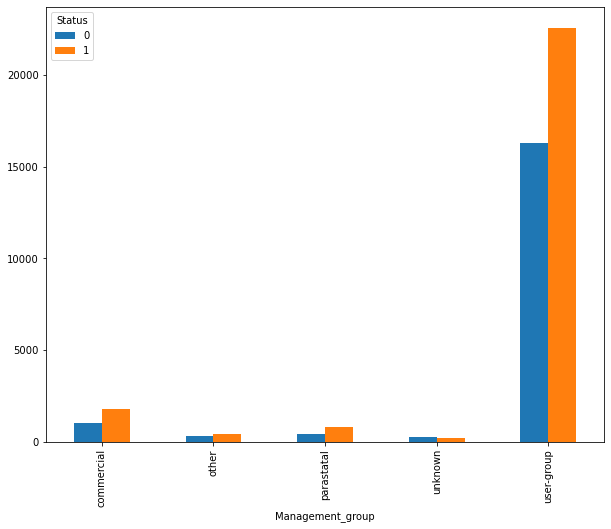

In [12]:
ctab = pd.crosstab(index=data['Management_group'], columns=data['Status'])
ctab.plot.bar(figsize=(10,8), xlabel='Management_group')

<AxesSubplot:>

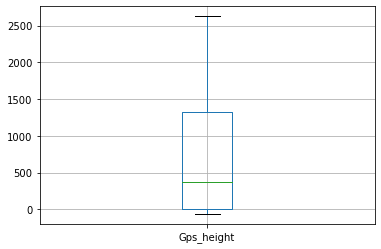

In [13]:
data.boxplot(column='Gps_height')

## DataType conversions

In [14]:
for i in ['Region_code','District_code']:
  data[i]=data[i].astype('category')

In [15]:
cat_cols= data.select_dtypes('object')
for i in cat_cols:
  data[i]=data[i].astype('category')

In [16]:
data.dtypes

Id                          int64
Amount_of_water           float64
Gps_height                  int64
Waterpoint_type          category
Basin_name               category
Village                  category
Regionname               category
Region_code              category
Wardname                 category
District_code            category
Population                  int64
Public_meeting           category
Organization_funding     category
Organization_surveyed    category
Scheme_management        category
SchemeName               category
Permit                   category
Company_installed        category
Management               category
Management_group         category
Extraction_type          category
Extraction_type_group    category
Extraction_type_class    category
Payment                  category
Payment_type             category
Water_quality            category
Quality_group            category
Quantity                 category
Quantity_group           category
Source        

In [17]:
data['Status'] = data['Status'].astype('category')

In [18]:
data.dtypes

Id                          int64
Amount_of_water           float64
Gps_height                  int64
Waterpoint_type          category
Basin_name               category
Village                  category
Regionname               category
Region_code              category
Wardname                 category
District_code            category
Population                  int64
Public_meeting           category
Organization_funding     category
Organization_surveyed    category
Scheme_management        category
SchemeName               category
Permit                   category
Company_installed        category
Management               category
Management_group         category
Extraction_type          category
Extraction_type_group    category
Extraction_type_class    category
Payment                  category
Payment_type             category
Water_quality            category
Quality_group            category
Quantity                 category
Quantity_group           category
Source        

## Droping the attributes which are having above 30% null values 

In [19]:
data.drop(['Id','Village','SchemeName','Organization_funding','Wardname','Company_installed'],axis=1,inplace = True)

## Splitting the dataset using train_test_split

In [20]:
X = data.drop('Status', axis=1)
y = data['Status']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, stratify=y, random_state=321) 

## Basic preprocessing like OnehotEncoding,Imputation,Standardizing

In [21]:
num_cols=['Public_meeting','Scheme_management','Permit']
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(X_train[num_cols])
X_train[num_cols] = imputer.transform(X_train[num_cols])

In [22]:
X_val[num_cols]=imputer.transform(X_val[num_cols])

In [23]:
cat_attr = X_train.select_dtypes(include=['category']).columns
cat_attr
enc = OneHotEncoder(drop = 'first',handle_unknown='ignore')
enc.fit(X_train[cat_attr])
X_train_encoding=pd.DataFrame(enc.transform(X_train[cat_attr]).toarray(),columns=enc.get_feature_names_out())
X_val_encoding=pd.DataFrame(enc.transform(X_val[cat_attr]).toarray(),columns=enc.get_feature_names_out())

C:\Users\rr388\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [24]:
num_attr = X_train.select_dtypes(include=['int64','float64']).columns
num_attr
scaler = StandardScaler()
scaler.fit(X_train[num_attr])
X_train_std = pd.DataFrame(scaler.transform(X_train[num_attr]),columns=X_train[num_attr].columns)
X_val_std = pd.DataFrame(scaler.transform(X_val[num_attr]),columns=X_train[num_attr].columns)

## concatinating the preprocessed datadets

In [25]:
X_train_con = pd.concat([X_train_std, X_train_encoding],axis=1)
X_val_con = pd.concat([X_val_std, X_val_encoding], axis=1)

In [26]:
X_train_con

,Amount_of_water,Gps_height,Population,Waterpoint_type_communal standpipe,Waterpoint_type_communal standpipe multiple,Waterpoint_type_dam,Waterpoint_type_hand pump,Waterpoint_type_improved spring,Waterpoint_type_other,Basin_name_basin2,...,Source_type_river/lake,Source_type_shallow well,Source_type_spring,Source_class_surface,Source_class_unknown,Waterpoint_type_group_communal standpipe,Waterpoint_type_group_dam,Waterpoint_type_group_hand pump,Waterpoint_type_group_improved spring,Waterpoint_type_group_other
0,-0.102078,-0.968802,-0.393492,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.102078,-0.968802,-0.393492,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.102078,1.506446,-0.391292,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.102078,-0.968802,-0.393492,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.102078,-0.968802,-0.393492,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30842,-0.102078,0.623755,-0.327513,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30843,-0.102078,-0.968802,-0.393492,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30844,-0.102078,1.159369,0.266297,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30845,-0.102078,-0.968802,-0.393492,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [27]:
X_train_con.dtypes

Amount_of_water                                float64
Gps_height                                     float64
Population                                     float64
Waterpoint_type_communal standpipe             float64
Waterpoint_type_communal standpipe multiple    float64
                                                ...   
Waterpoint_type_group_communal standpipe       float64
Waterpoint_type_group_dam                      float64
Waterpoint_type_group_hand pump                float64
Waterpoint_type_group_improved spring          float64
Waterpoint_type_group_other                    float64
Length: 185, dtype: object

In [28]:
X_train_con.columns

Index(['Amount_of_water', 'Gps_height', 'Population',
       'Waterpoint_type_communal standpipe',
       'Waterpoint_type_communal standpipe multiple', 'Waterpoint_type_dam',
       'Waterpoint_type_hand pump', 'Waterpoint_type_improved spring',
       'Waterpoint_type_other', 'Basin_name_basin2',
       ...
       'Source_type_river/lake', 'Source_type_shallow well',
       'Source_type_spring', 'Source_class_surface', 'Source_class_unknown',
       'Waterpoint_type_group_communal standpipe', 'Waterpoint_type_group_dam',
       'Waterpoint_type_group_hand pump',
       'Waterpoint_type_group_improved spring', 'Waterpoint_type_group_other'],
      dtype='object', length=185)

In [29]:
for i in X_train_con.columns:
    X_train_con[i]=X_train_con[i].astype('uint8')

## Building the model 

In [30]:
param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 12], 
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 5]}
DTC= DecisionTreeClassifier()
DTC_grid = GridSearchCV(DTC, param_grid, cv=3)
DTC_grid.fit(X_train_con, y_train)
DTC_grid.best_params_
train_pred = DTC_grid.predict(X_train_con)
val_pred = DTC_grid.predict(X_val_con)

## Error metrics and predictions

In [31]:
print("train accuracy")
evaluate_model(y_train, train_pred)
print("test accuracy")
evaluate_model(y_val, val_pred)

train accuracy
Accurcay :  0.895808344409505
test accuracy
Accurcay :  0.8042508131003706
